In [ ]:
#Importing Basic required libraries
import numpy as np
import pandas as pd

<a id="1"></a><br>
# 1. Gathering Data

In [ ]:
#  Create New Variable and stores the dataset values as Data Frame

loan_train = pd.read_csv('train_LP.csv')

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Shape
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


In [ ]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [ ]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001391    1
LP002194    1
LP001536    1
LP001030    1
LP001892    1
           ..
LP001994    1
LP001100    1
LP001255    1
LP001516    1
LP002738    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
import missingno as msno

In [ ]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

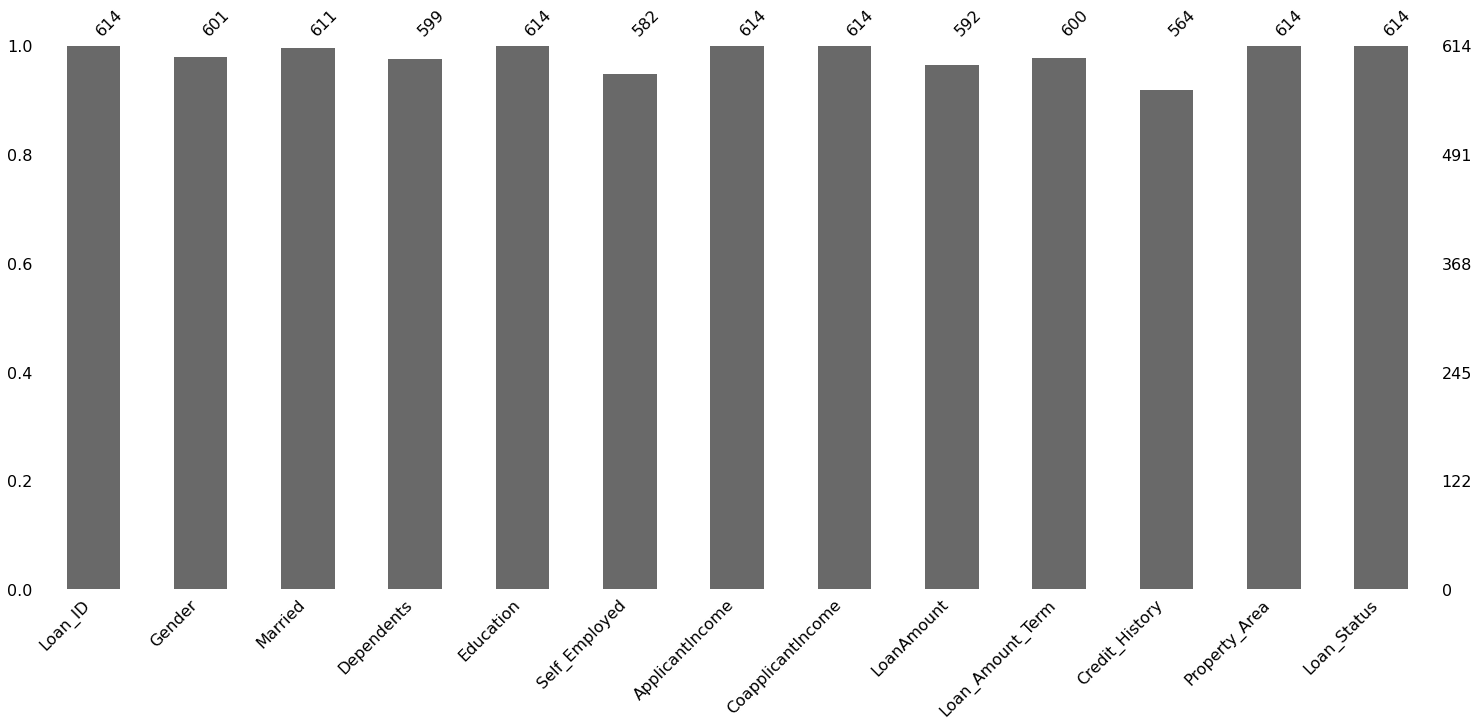

In [ ]:
msno.bar(loan_train)

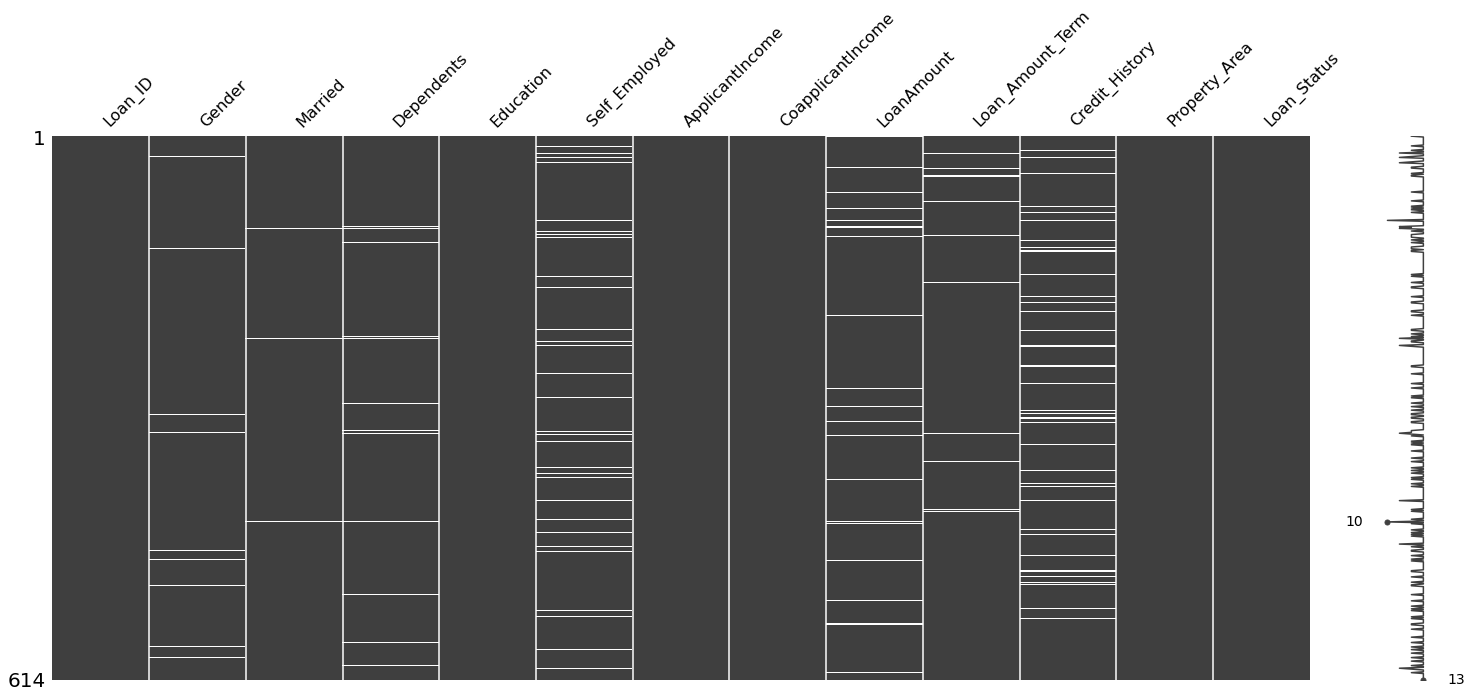

In [ ]:
msno.matrix(loan_train )


In [ ]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean

### # convert Categorical variable with Numerical values.

`Loan_Status` feature boolean values, So we replace `Y` values with `1` and `N` values with `0`
and same for other `Boolean` types of columns

In [ ]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_train.Property_Area = loan_train.Property_Area.replace({"Urban": 2, "Semiurban": 1, "Rural" : 0})

loan_train.Education = loan_train.Education.replace({"Graduate": 1, "Not Graduate": 0})

In [ ]:

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)

* Here, `Property_Area`, `Dependents` and `Education` has multiple values so now we can use `LabelEncoder` from `sklearn` package

In [ ]:
"""from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])"""

"from sklearn.preprocessing import LabelEncoder\nfeature_col = ['Property_Area','Education', 'Dependents']\nle = LabelEncoder()\nfor col in feature_col:\n    loan_train[col] = le.fit_transform(loan_train[col])\n    loan_test[col] = le.fit_transform(loan_test[col])"

<a id="3"></a><br>
# 3. Data Visualizations


In this section, We are showing the visual information from the dataset, For that we need some pakages that are `matplotlib` and `seaborn`



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')


In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


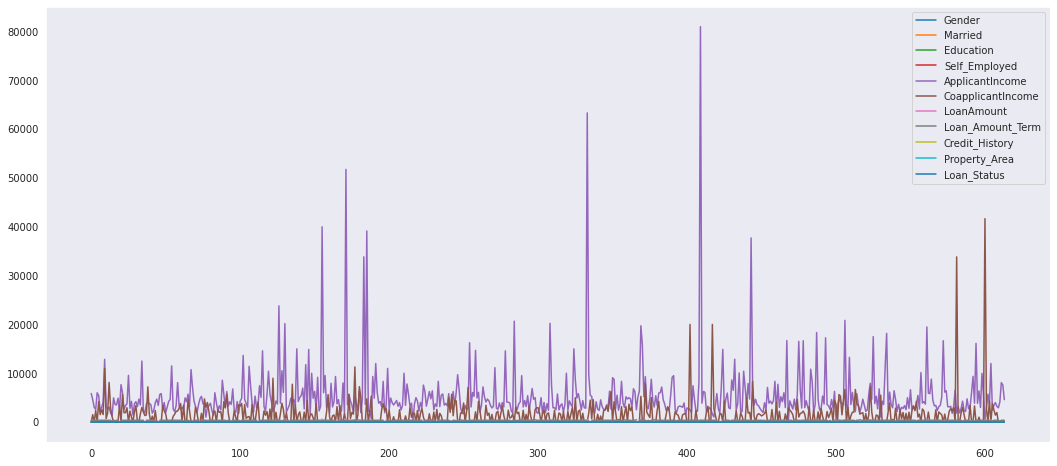

In [ ]:
loan_train.plot(figsize=(18, 8))

plt.show()

In [ ]:
def plots(col):
  plt.figure(figsize=(18, 6))
  plt.subplot(1, 2, 1)
  loan_train[col].hist(bins=10)
  plt.title(col)

  plt.subplot(1, 2, 2)
  plt.grid()
  plt.hist(np.log(loan_train[col]))
  plt.title("Log "+col)

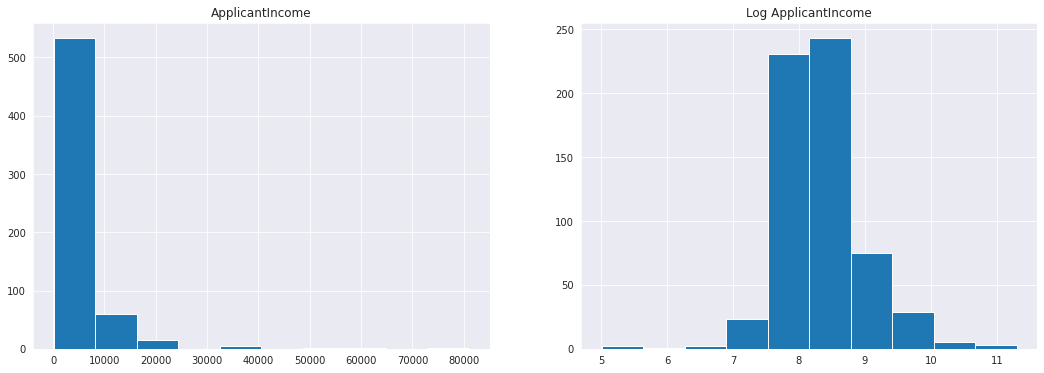

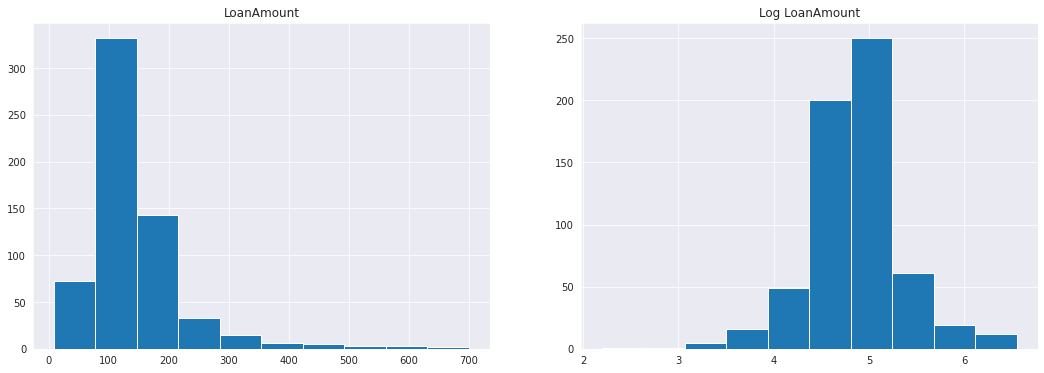

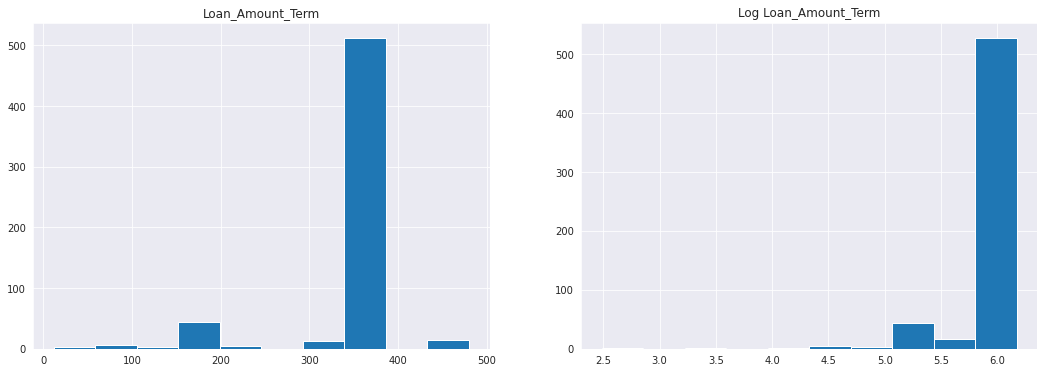

In [ ]:
cols = ['ApplicantIncome','LoanAmount','Loan_Amount_Term']

for col in cols:
  plots(col)

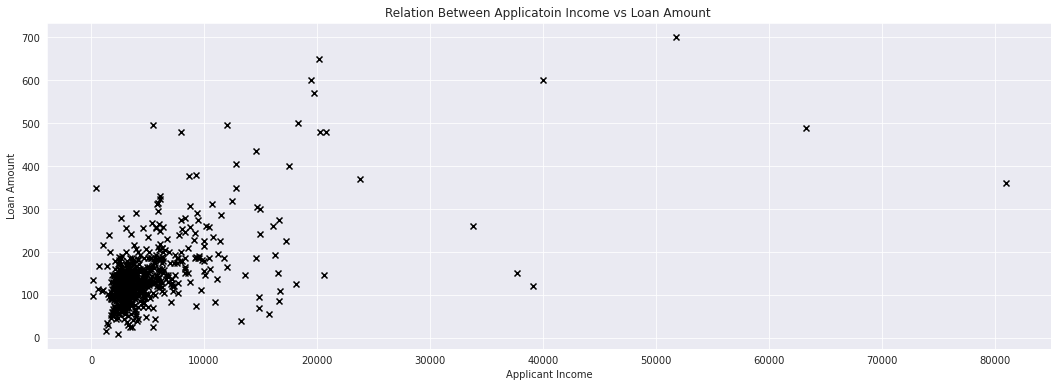

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

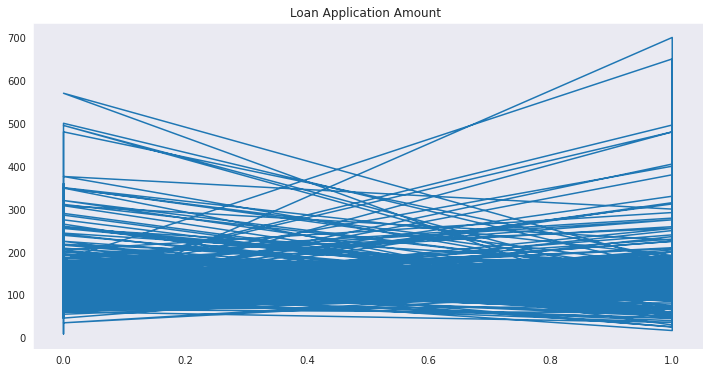

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

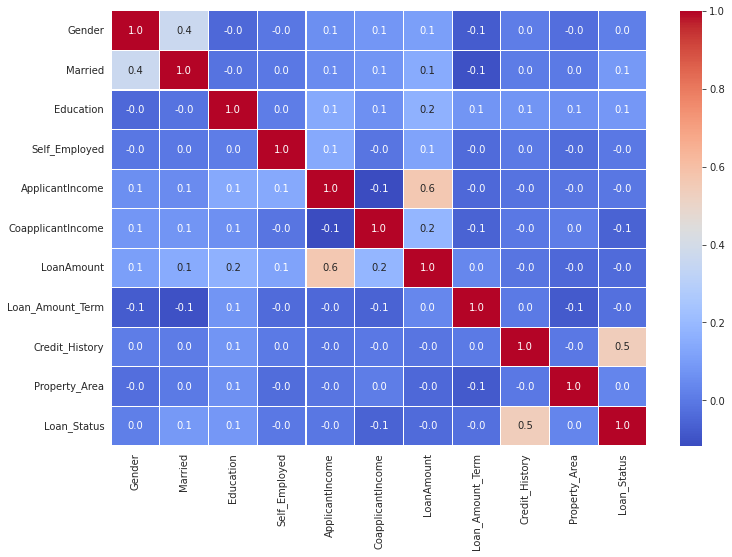

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

<a id="4"></a><br>
# 4. Choose ML Model.

* In this step, We have a lots of Machine Learning Model from sklearn package, and we need to decide which model is give us the better performance. then we use that model in final stage and send to the production level.

In [ ]:
# import ml model from sklearn pacakge

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


<a id="5"></a><br>
# 5. Traing the ML Model

In [ ]:
train_features = ['Credit_History', 'Education', 'Gender', 'ApplicantIncome', 'Property_Area']

x = loan_train[train_features].values
y = loan_train['Loan_Status'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state = 24)

In [ ]:
x_train[0]

array([1.000e+00, 0.000e+00, 1.000e+00, 3.095e+03, 0.000e+00])

In [ ]:
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Fit the model

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score

random_predict_train = rf.predict(x_train)
print('Training Set Evaluation with  Random Forest F1-Score=>',f1_score(y_train,random_predict_train))

Training Set Evaluation with  Random Forest F1-Score=> 0.9954887218045113


In [ ]:
random_predict_test = rf.predict(x_test)
print('Testing Set Evaluation with  Random Forest F1-Score=>',f1_score(y_test,random_predict_test))

Testing Set Evaluation with  Random Forest F1-Score=> 0.7906976744186045


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [ ]:
from sklearn.metrics import f1_score
random_predict_train = rf_random.predict(x_train)
print('Training Set Evaluation with  Random Forest F1-Score=>',f1_score(y_train,random_predict_train))

Training Set Evaluation with  Random Forest F1-Score=> 0.8819538670284939


In [ ]:
random_predict_test = rf_random.predict(x_test)
print('Testing Set Evaluation with  Random Forest F1-Score=>',f1_score(y_test,random_predict_test))

Testing Set Evaluation with  Random Forest F1-Score=> 0.8923076923076922


<a id="6"></a><br>
# 6. Predict Model

In [ ]:
# Predict the model for testin data

predicted = rf_random.predict(x_test)


<a id="7"></a><br>
# 7. Deploy Model

In [ ]:
import pickle as pkl

In [ ]:
# save the model to disk
filename = 'rf_random.pkl'
pkl.dump(rf_random, open(filename, 'wb')) # wb means write as binary

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
train_features = ['Credit_History', 'Education', 'Gender', 'ApplicantIncome', 'Property_Area']

load_model = pkl.load(open('rf_random.pkl', 'rb'))

# dta = np.array([1.0, 1, 1.0, 5000,2])

dta = np.array([1, 0, 0, 2000, 0])
load_model.predict(dta.reshape(1, -1))

array([1])